<a href="https://colab.research.google.com/github/SettaChai022/Python_dataviz2023/blob/main/SBOLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
!pip install scikit-learn tensorflow keras

In [6]:
from google.colab import drive
drive.mount('/content/drive')  # mount =  เชื่อมไดร์ฟ

Mounted at /content/drive


In [14]:
data1 = pd.read_excel('/content/drive/MyDrive/งาน/ตย.ข้อมูลแล็บ.xlsx')
data1.head()

,ว.ด.ป,น้ำหนักรำ (g),น้ำ (ml),ก่อนต้ม,Unnamed: 4,หลังต้ม,Unnamed: 6,น้ำหนักโปรตีน (g),%yield,Method,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,pH ก่อนปรับ,pH หลังปรับ,pH ก่อนปรับ,pH หลังปรับ,NaN,NaN,NaN,NaN,NaN
1,06.05.2025,30.0096,180.0,6.53,11,8.37,4.01,0.6045,0.020144,สูตรเอทานอล,NaN,1) อะไรบ้างที่ส่งผลต่อ %yield
2,07.05.2025,30.0262,180.0,6.46,11.1,8.52,4.08,0.6915,0.023030,สูตรเอทานอล,NaN,2) แต่ละ method ได้ %yield ต่างกันหรือไม่
3,08.05.2025,30.0031,180.0,6.2,11.06,8.49,4.05,0.9693,0.032307,สูตรเอทานอล,NaN,NaN
4,09.05.2025,30.0084,180.0,6.28,11.03,8.49,4.07,1.0613,0.035367,สูตรเอทานอล,NaN,NaN


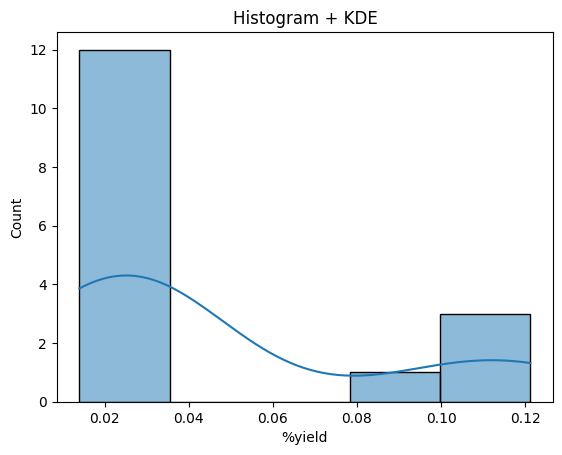

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data1['%yield'], kde=True)
plt.title("Histogram + KDE")
plt.show()
# ถ้ากราฟเป็น "รูปโค้งระฆัง" แสดงว่ามีแนวโน้มปกติ

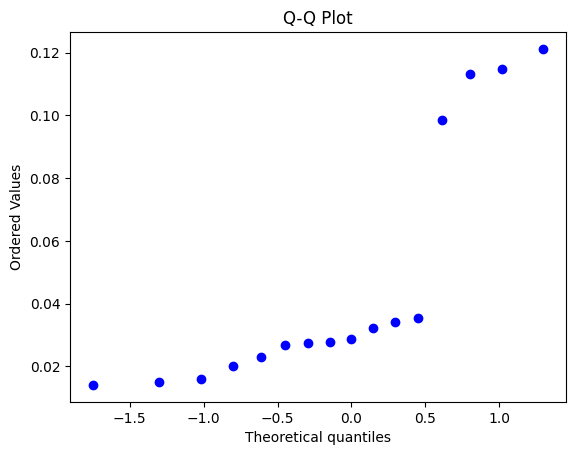

In [16]:
# ใช้ Q-Q Plot เช็คความตรงของจุด
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(data1['%yield'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# ถ้าจุดเรียงตามเส้นตรง = ใกล้เคียงการแจกแจง

In [17]:
from scipy.stats import shapiro

stat, p = shapiro(data1['%yield'])
print("Shapiro-Wilk Test: p-value =", p)

if p > 0.05:
  print("1 ข้อมูลเป้นการแจกแจงปกติ")
else:
  print("0 ข้อมูลไม่เป็นการแจกแจงปกติ")

Shapiro-Wilk Test: p-value = nan
0 ข้อมูลไม่เป็นการแจกแจงปกติ


- ข้อมูล %yield เป็นการแจกแจงไม่ปกติ


# ทดสอบว่าแต่ละ method ได้ %yield ต่างกันหรือไม่
 ## ระหว่างสูตรเอทานอล กับสูตร 2

In [20]:
from scipy.stats import mannwhitneyu

# กรองเฉพาะสูตรที่ต้องการ
df_filtered = data1[data1["Method"].isin(["สูตรเอทานอล", "สูตร 2"])]

# แยกกลุ่ม
ethanol = df_filtered[df_filtered["Method"] == "สูตรเอทานอล"]["%yield"]
formula2 = df_filtered[df_filtered["Method"] == "สูตร 2"]["%yield"]

# Mann-Whitney U test
stat, p = mannwhitneyu(ethanol, formula2, alternative='two-sided')
print("Mann-Whitney U Test: p-value =", p)

if p > 0.05:
    print("✔️ ไม่มีความแตกต่างอย่างมีนัยสำคัญของ %yield ระหว่างสูตรเอทานอล กับ สูตร 2")
else:
    print("❌ มีความแตกต่างอย่างมีนัยสำคัญของ %yield ระหว่างสูตรเอทานอล กับ สูตร 2")

Mann-Whitney U Test: p-value = nan
❌ มีความแตกต่างอย่างมีนัยสำคัญของ %yield ระหว่างสูตรเอทานอล กับ สูตร 2


/tmp/ipython-input-20-419250616.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(ethanol, formula2, alternative='two-sided')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

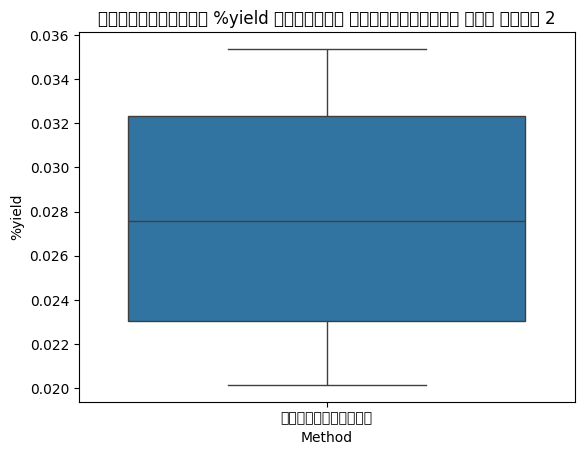

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Method", y="%yield", data=df_filtered)
plt.title("เปรียบเทียบ %yield ระหว่าง สูตรเอทานอล กับ สูตร 2")
plt.ylabel("%yield")
plt.xlabel("Method")
plt.show()